In [1]:
import sys
import os
import importlib

import pandas as pd
import seaborn as sns

import dart.Util
import dart.metrics.start_calculations

In [2]:
config = {
    'test_size': 1000, 
    'metrics':  ['calibration', 'fragmentation', 'activation', 'representation', 'alternative_voices'],
    'cutoff': [1, 2, 5, 10, 20, 0],
    'algorithms': ['lstur', 'pop', 'random'],
    'output_folder': 'output/',
    'language': 'english'
}

articles, recommendations, behavior_file = dart.Util.read_files()

In [3]:
calculator = dart.metrics.start_calculations.MetricsCalculator(config, articles, recommendations, behavior_file)

2022-11-07 13:55:12.570488	starting calculations
0/1000
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
18000 successfully calculated
0 failed
2022-11-07 13:59:37.834734	done


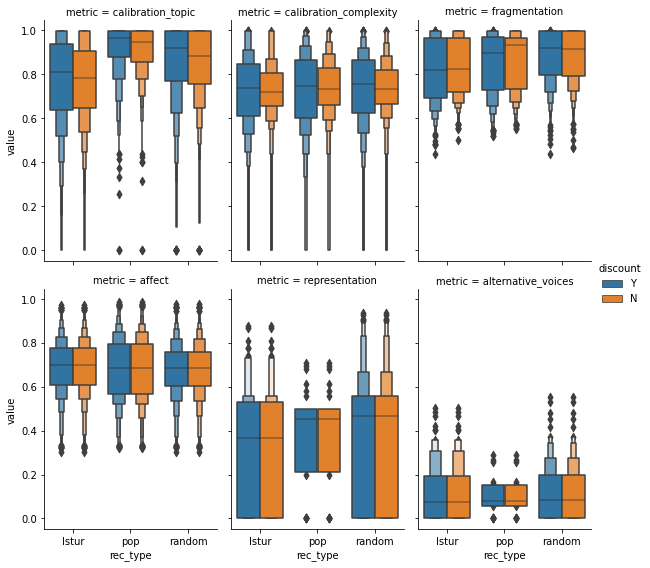

In [4]:
df = calculator.execute()

In [5]:
df

,impr_index,rec_type,cutoff,distance,discount,metric,value
0,63101,lstur,1,kl,Y,calibration_topic,9.941270
1,63101,lstur,1,jsd,Y,calibration_topic,0.994280
2,63101,lstur,1,kl,N,calibration_topic,9.944412
3,63101,lstur,1,jsd,N,calibration_topic,0.994280
4,63101,lstur,1,kl,Y,calibration_complexity,9.941270
...,...,...,...,...,...,...,...
294787,3658,random,0,jsd,N,fragmentation,0.679285
294788,3658,random,0,kl,Y,affect,7.692956
294789,3658,random,0,jsd,Y,affect,0.792667
294790,3658,random,0,kl,N,affect,7.695540
